In [1]:
import numpy as np
from numpy import array, random, dot
import matplotlib.pyplot as plt
from sklearn import datasets

# Regression


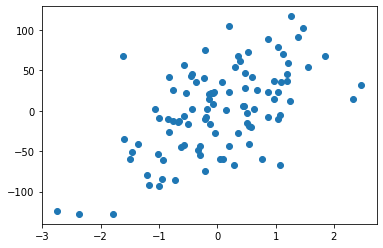

In [95]:
X, Y = datasets.make_regression(n_features=3,n_targets=1)
plt.scatter(X[:, 0], Y, cmap='viridis')
plt.show()

# Classification

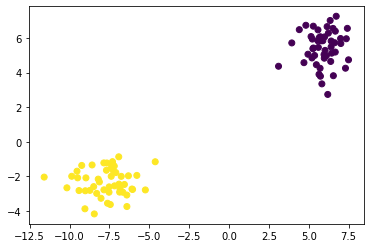

In [130]:
X, Y = datasets.make_blobs(n_samples=100, n_features=3, centers=2)
plt.scatter(X[:, 0], X[:, 1],c=[Y], cmap='viridis')
plt.show()

In [112]:
def encode_indices(y):
    '''
    Simple one hot encoder for softmax 
    y = all target labels (1,2,0,...,2)
    y_encoded = [[0,1,0], [0,0,1],... etc]
    '''
    b = np.zeros((y.size, y.max() + 1))
    b[np.arange(y.size), y] = 1
    return b

---

In [6]:
class activation():
    def __init__(self):
        pass
    def activation(self,):
        pass
    def derivative(self,):
        pass

In [7]:
class softmax_act(activation):
    def __name__(self):
        return 'softmax'
    
    def activation(self,z):
        exp_outputs = np.exp([z])
        probabilities = exp_outputs / np.sum(exp_outputs, axis=1, keepdims=True)
        return probabilities.flatten()
    
    def derivative(self,A):
        return np.diagflat(A) - np.outer(A, A)

In [8]:
class sigmoid_act(activation):
    def __name__(self):
        return 'sigmoid'
    
    def activation(self,z):
        return 1/(1+np.exp(-z))
    
    def derivative(self,A):
        return A *  (1 - A)

In [9]:
class relu_act(activation):
    def __name__(self):
        return 'relu'
    
    def activation(self,z):
        return np.maximum(0,z)
    
    def derivative(self,A):
        # is this wrong?
        A[A < 0] = 0
        A[A > 0] = 1
        return A 
    
#     def derivative(self, dA, Z):
#         """
#         ReLU Derivative Function
#         """
#         dZ = np.array(dA, copy = True)
#         dZ[Z <= 0] = 0
#         return dZ

In [10]:
class identity_act(activation):
    def __name__(self):
        return 'identity'
    
    def activation(self,z):
        return z
    
    def derivative(self,A):
        return 1

---

In [11]:
class loss():
    def __init__(self):
        pass
    def loss(self,):
        pass
    def derivative(self,):
        pass

In [12]:
class ce_loss(loss):
    def loss(self,A,y):
        '''
        softmax cross entropy loss
        y encoded targets!
        loss = - sum (log(y_hat) * y)
        
        '''
        loss = - dot(np.log(A), y)
        return loss
    
        
    def derivative(self,A,y):
        dA = - y / A # CEd(loss) / d (output:A)
        return dA

In [13]:
class bce_loss(loss):
    def loss(self,A,y):
        '''
        binary cross entropy loss (no encoding)
        loss = (-y * log(A) - (1-y) * log (1-A)
        '''
        
        loss = - y * np.log(A) - (1-y) * np.log(1-A) # binary CE
        return loss
    
        
    def derivative(self,A,y):
        dA = - (y / (A)) + ((1 - y) / (1 - A)) # bce derivation
        return dA

In [14]:
class mse_loss(loss):
    def loss(self, A, y):
        '''
        mean square error loss
        '''
        loss = np.average( (y - A)**2 )
        return loss
    
    def derivative(self,A,y):
        dA =  - 2 * (y - A)
        return dA

---

In [7]:
W = np.array([[1,2,3],[1,2,3],[1,2,3]]) 
A_prev = np.array([1,2,3]).flatten()
b = np.zeros((3,1))
b = A_prev.reshape(-1,1)

In [8]:
print(W.shape, A_prev.shape, b.shape)

(3, 3) (3,) (3, 1)


In [61]:
A_prev.reshape(-1,1).ndim

2

In [63]:
np.expand_dims(A_prev, axis = 1)

array([[1],
       [2],
       [3]])

In [57]:
A_prev.ndim

1

In [9]:
A_prev + b

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [5]:
np.dot(W, A_prev) + b

array([[14., 14., 14.],
       [14., 14., 14.],
       [14., 14., 14.]])

In [18]:
W @ A_prev + b.flatten()

array([14., 14., 14.])

In [204]:
class DenseLayer():
    '''
    Dense layer contains neurons (units)
    properties:
        - Z, A, Activation function, B, W, A_prev
        - dA_next is generated from next layer used for current gradients
        - dZ : activation function derivative
        - dW : dA * dZ * Aprev
        - db : dA * dZ * 1
    '''
    def __init__(self, units, activation): # activation_function, activation_derivative):
        self.properties = {'W':0, 'b':0, 'Z':0,'A':0,'A_prev':0}
        self.grads = {'dW':0, 'db':0, 'dZ':0,'dA_next':0}
        self.units = units
        self.activation = activation
        
    def _compile_dimensions(self, A_prev_dimension):
        self.properties['W'] = np.random.randn(self.units,A_prev_dimension) * 0.01
        self.properties['b'] = np.zeros((self.units,1))
        
        self.properties['Z'] = np.zeros(shape=(self.units, 1)) #(n[l],m) , m number of inputs, (1 for one input A_prev)
        self.properties['A'] = np.zeros(shape=(self.units, 1)) #(n[l],m)
        
    def _forward_pass(self, A_prev):
        self.properties['A_prev'] = A_prev
        # broadcasting problems when using (+)
        self.properties['Z'] = dot(self.properties['W'], A_prev ) + np.squeeze(self.properties['b']) #(n[l],1)
        self.properties['A'] = self.activation.activation(self.properties['Z']) # (n[l],1)
#         print(f""" ForwardPass
#                   - Layer units {self.units}
#                   - A {self.properties['A'].shape}
#                   - Z {self.properties['Z'].shape}
#                   - W {self.properties['W'].shape}
#                   - b {self.properties['b'].shape}
#                   - Aprev {A_prev.shape}
#                """)
        assert self.properties['A'].shape == self.properties['Z'].shape
        
#         print(f""" ForwardPass
#                   - Layer units {self.units}
#                   - A {self.properties['A'].shape}
#                   - Z {self.properties['Z'].shape}
#                   - W {self.properties['W'].shape}
#                   - b {self.properties['b'].shape}
#                   - Aprev {A_prev.shape}
#                """)
        return self.properties['A']
    
    def _backward_pass(self,dA):

        self.grads['dA'] = dA
        # element wise multiplication
        # avoid braodcasting using squeeze (3,1) * (3,1)

#         print(self.grads['dA'].shape)
#         print(self.properties['A'].shape)
#         assert self.grads['dA'].shape == self.properties['A'].shape
#         assert self.grads['dZ'].shape == self.properties['Z'].shape
#             print(f""" Backward Pass
#             - Layer units {self.units}
#             - dA {self.grads['dA'].shape}
#             - dZ {self.grads['dZ'].shape}
#             - dZ {self.grads['dZ']}
#             - dA/dZ {self.activation.derivative(self.properties['A'])}
#             """
#             )

        if self.activation.__name__() == 'softmax':
            self.grads['dZ'] = np.dot(np.squeeze(self.grads['dA']) , np.squeeze(self.activation.derivative(self.properties['A']))) #.reshape(-1,1)
        else:
            self.grads['dZ'] = np.multiply(np.squeeze(self.grads['dA']) , np.squeeze(self.activation.derivative(self.properties['A']))) #.reshape(-1,1)

            
        self.grads['dW'] = np.dot(self.grads['dZ'].reshape(-1,1) , self.properties['A_prev'].reshape(-1,1).T)
        self.grads['db'] = np.sum(self.grads['dZ'].reshape(-1,1), axis=1, keepdims=True) #/m
        dA = np.dot(self.properties['W'].T, self.grads['dZ'])
        
#         print(f""" Backward Pass
#         - Layer units {self.units}
#         - dW {self.grads['dW'].shape}
#         - db {self.grads['db'].shape}
#         - dA-1 {dA.shape}
#         """)
        return dA
        
    def _update_grads(self, lr=0.01):
        self.properties['W'] = self.properties['W'] - lr * self.grads['dW']
        self.properties['b'] = self.properties['b'] - lr * self.grads['db']

In [195]:
class Modellayers():
    '''
    layer composition
    '''
    def __init__(self):
        self.layers = []
        self.input_shape = None
        self.lr = 0.01
        self.verbosity = 0
    def add(self, layer):
        self.layers.append(layer)
        
    def compile_layers(self, input_shape=(1,)):
        A_prev_dim = input_shape[0]
        self.input_shape = input_shape
        for layer in self.layers:
            layer._compile_dimensions(A_prev_dim)
            A_prev_dim = layer.units
            
    def forward_pass(self, inputs):
        A_prev = inputs 
#         if inputs.ndim <=1:
#             A_prev = np.expand_dims(inputs, axis = 1)
        for layer in self.layers:
            A_prev = layer._forward_pass(A_prev)
        return A_prev # last output is the input to next layer
    
    def backward_pass(self, output, y, loss_derivative):
        output = output.flatten()
        dA = loss_derivative(output, y)
        if(self.verbosity > 1):
            print(f'''dL/dA : {dA.shape}''')
            print('--- ', '1 backward pass')
        for i, layer in enumerate(reversed(self.layers)):
            if(self.verbosity > 1):
                print('---'*10)
                print(i, 'start')
            dA = layer._backward_pass(dA)
            layer._update_grads(self.lr)
            if(self.verbosity > 1):
                print(i, 'done')
                print('---'*10)
            
    def train(self, Input_X, Input_Y, loss_function, lr = 0.01, epochs = 10):
        self.lr = lr
        epoch_loss = []

        for epoch in range(epochs):
            epoch_loss.append(0)
            for i, x in enumerate(Input_X):
                output = self.forward_pass(x)
                loss = loss_function.loss(output, Input_Y[i])
                self.backward_pass(output, Input_Y[i], loss_function.derivative)
                epoch_loss[epoch] += loss
                print('sample loss : ', epoch_loss[-1])
        return epoch_loss
   
    
    def view_model(self):
        print("input_layer : ", self.input_shape)
        for layer in self.layers:
            print('--'*10)
            print("dense_layer : ")
            print("\tW",  layer.properties['W'].shape)
            print("\tA",  layer.properties['A'].shape, layer.activation.__name__())

In [167]:
mse_loss_func = mse_loss()
ce_loss_func = ce_loss()
relu_func = relu_act()
softmax_func= softmax_act()
sigmoid_func = sigmoid_act()
identity_func = identity_act()

In [205]:
model = Modellayers()
model.add(DenseLayer(2, relu_func))
model.add(DenseLayer(2, softmax_func))
model.compile_layers(input_shape=(3,))
model.view_model()

input_layer :  (3,)
--------------------
dense_layer : 
	W (2, 3)
	A (2, 1) relu
--------------------
dense_layer : 
	W (2, 2)
	A (2, 1) softmax


sample loss :  0.6944421636842926
sample loss :  1.332516986335719
sample loss :  1.9203766652399978
sample loss :  2.4588524467112394
sample loss :  3.37384527799046
sample loss :  3.913737999173544
sample loss :  4.804872125754424
sample loss :  5.62144614365945
sample loss :  6.371199302075174
sample loss :  7.060765688977902
sample loss :  7.7193685866768185
sample loss :  8.201802007596712
sample loss :  8.436670259767153
sample loss :  8.524669320988675
sample loss :  8.583507225164228
sample loss :  9.353218896468606
sample loss :  9.394162847466392
sample loss :  10.101338265468435
sample loss :  10.73570851442136
sample loss :  10.754616723265546
sample loss :  10.76633125081706
sample loss :  11.322133574968836
sample loss :  11.33663096857502
sample loss :  11.357396693224317
sample loss :  11.376048840708377
sample loss :  11.81698290529825
sample loss :  12.082926445986638
sample loss :  12.277437000632364
sample loss :  12.293889010407474
sample loss :  12.384662357399106

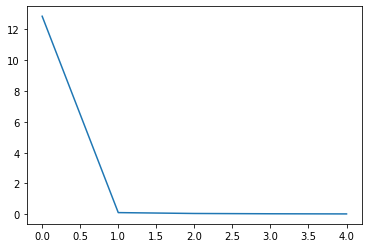

In [206]:
model.verbosity = 0
Y_encoded = encode_indices(Y)
epoch_loss = model.train(X, Y_encoded, loss_function=ce_loss_func, lr = 0.11, epochs=5)
plt.plot(epoch_loss)

In [202]:
def evaluate_softmax(X, model):
    y_hat = []
    for i, x in enumerate(X):
        A = model.forward_pass(x)
        y_hat.append(np.argmax(A))
        
    return np.array(y_hat) 

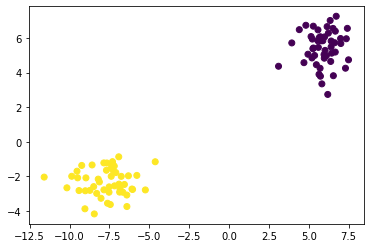

In [207]:
y_hat= evaluate_softmax(X, model)
plt.scatter(X[:, 0], X[:, 1],c=[y_hat])
plt.show()

In [ ]:
def evaluate_bce(X, model):
    y_hat = []
    for i, x in enumerate(X):
        A = model.forward_pass(x)
        y_hat.append(A)

    return np.array(y_hat) > 0.5

In [106]:
def evaluate_mse(X, model):
    y_hat = []
    for i, x in enumerate(X):
        A = model.forward_pass(x)
        y_hat.append(A)

    return np.array(y_hat)

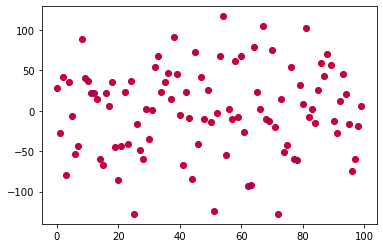

In [109]:
y_hat= evaluate_mse(X, model)
plt.scatter(range(len(y_hat)), y_hat, c='red')
plt.scatter(range(len(Y)), Y, c='blue', alpha=0.2)
plt.show()

In [ ]:
y_hat= evaluate_bce(X, model)
plt.scatter(X[:, 0], X[:, 1],c=[y_hat])
plt.show()